In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
import pyproj
import numpy as np

In [113]:
import utm
from tqdm import tqdm

# read data

In [19]:
rock = pd.read_csv('Geochemistry Data/CNS rock samples.csv')

In [61]:
feat_1 = pd.read_csv('data_for_feat.csv')

In [62]:
feat_1 = feat_1.drop(['Unnamed: 0'], axis=1)

In [63]:
cols = ['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT']

for col in cols:
    feat_1[col] = feat_1[col].fillna(feat_1[col].median())
feat_1

,WH_LAT,WH_LONG,SH_DEPTH_TOP_FT,SH_FORM
0,57.032223,1.953816,9814.00,SELE
1,57.032223,1.953816,9814.00,SELE
2,57.032223,1.953816,5400.00,Lark
3,57.032223,1.953816,6600.00,Lark
4,57.032223,1.953816,7300.00,Lark
...,...,...,...,...
1704,58.036853,-0.891146,6542.00,NaN
1705,58.036853,-0.891146,6542.00,NaN
1706,58.019424,-0.912446,6458.00,NaN
1707,58.367536,-0.081898,9447.01,NaN


In [64]:
feat_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 4 columns):
WH_LAT             1709 non-null float64
WH_LONG            1709 non-null float64
SH_DEPTH_TOP_FT    1709 non-null float64
SH_FORM            1386 non-null object
dtypes: float64(3), object(1)
memory usage: 53.5+ KB


In [65]:
lat = feat_1['WH_LAT'].values
long = feat_1['WH_LONG'].values

x, y = [], []
for la, lo in zip(lat, long): 
    res = utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')
    x.append(res[0])
    y.append(res[1])

In [111]:
feat_1['WH_LAT'] = x
feat_1['WH_LONG'] = y

In [114]:
tmp = pd.DataFrame()
for i in tqdm(range(feat_1.shape[0])):
    tmp = tmp.append(get_rock_features(*feat_1.iloc[i, :-1].values))
tmp

100%|██████████| 1709/1709 [00:22<00:00, 74.68it/s]


,H_INDEX,O_INDEX,P_INDEX,REV_TMAX,REV_TOTS1,REV_TOTS2,REV_TOTS3,TOC,distance,rp_lab_cat,rp_method_cat
4604,267,93.5,0.114427861,435,0.69,5.34,1.87,2,1418.706639,1.0,1.0
4604,267,93.5,0.114427861,435,0.69,5.34,1.87,2,1418.706639,1.0,1.0
4672,185.625,NaN,0.041935484,429,0.26,5.94,NaN,3.2,2409.067579,1.0,0.0
4669,172.3076923,NaN,0.035522067,435,0.33,8.96,NaN,5.2,2410.561221,1.0,0.0
4821,162.7272727,210,0.186363636,434,0.41,1.79,2.31,1.1,2187.031227,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12601,77,NaN,0.189474,488,0.18,0.77,NaN,1,1838.540894,1.0,1.0
12601,77,NaN,0.189474,488,0.18,0.77,NaN,1,1838.540894,1.0,1.0
12610,83.3333,NaN,0.253731,486,0.17,0.5,NaN,0.6,103.190343,1.0,1.0
12785,293.684,NaN,0.0882353,437,0.54,5.58,NaN,1.9,777.808906,1.0,0.0


In [116]:
tmp.to_csv('add_feat.csv', index=False)

In [117]:
feat_1

,WH_LAT,WH_LONG,SH_DEPTH_TOP_FT,SH_FORM
0,436502.900511,6.321459e+06,9814.00,SELE
1,436502.900511,6.321459e+06,9814.00,SELE
2,436502.900511,6.321459e+06,5400.00,Lark
3,436502.900511,6.321459e+06,6600.00,Lark
4,436502.900511,6.321459e+06,7300.00,Lark
...,...,...,...,...
1704,270311.424816,6.439434e+06,6542.00,NaN
1705,270311.424816,6.439434e+06,6542.00,NaN
1706,268942.528392,6.437568e+06,6458.00,NaN
1707,319740.875869,6.473760e+06,9447.01,NaN


# coords to meter

In [20]:
rock['WH_LAT'] = pd.to_numeric(rock['WH_LAT'], errors = 'coerce')

In [21]:
rock['WH_LONG'] = pd.to_numeric(rock['WH_LONG'], errors = 'coerce')

In [22]:
rock = rock.loc[(~rock['WH_LAT'].isnull()) & (~rock['WH_LONG'].isnull()), :]

In [23]:
lat = rock['WH_LAT'].values
long = rock['WH_LONG'].values

In [24]:
x, y, num, let = [], [], [], []
for la, lo in zip(lat, long): 
    res = utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')
    x.append(res[0])
    y.append(res[1])
    num.append(res[2])
    let.append(res[3])

In [25]:
rock['x'] = x
rock['y'] = y

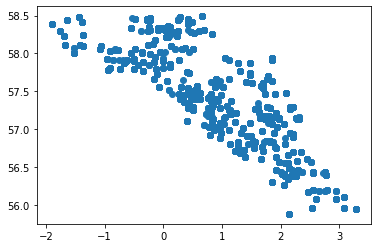

In [26]:
plt.plot(rock['WH_LONG'], rock['WH_LAT'], 'o')

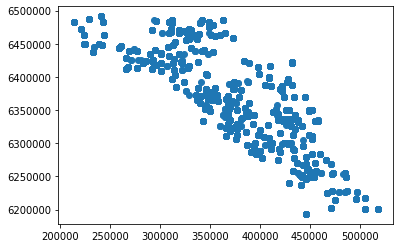

In [27]:
plt.plot(rock['x'], rock['y'], 'o')

In [28]:
rock['SH_DEPTH_TOP_FT'] = pd.to_numeric(rock['SH_DEPTH_TOP_FT'], errors = 'coerce')

In [29]:
rock['SH_DEPTH_TOP_FT'].isnull().sum()

0

# separate rock eval from ooil analyzer

In [30]:
from copy import copy

In [31]:
rockre = rock.loc[(rock['RP_METHOD'].isin(['RockEval', 'Oil analyzer']) ) & (~rock['WH_LAT'].isnull()) & (~rock['WH_LONG'].isnull()), :]

In [32]:
rockre = copy(rockre)

In [33]:
rockre['rp_method_cat'] = rockre['RP_METHOD'].astype('category').cat.codes
rockre['rp_lab_cat'] = rockre['RP_LAB'].astype('category').cat.codes

# check dict

In [34]:
x, y, z = 518069.859848, 6.201034e+06, 10305.45

In [35]:
rockre['distance'] = 0

In [36]:
rockre.loc[:, 'distance'] = ((rockre['x'] - x) ** 2 + (rockre['x'] - x) ** 2 + (rockre['SH_DEPTH_TOP_FT'] - z) ** 2) ** 0.5

In [37]:
rock_feats = [
    'TOC', 'rp_method_cat', 
    'rp_lab_cat', 
    'REV_TOTS1', 'REV_TOTS2', 
    'REV_TOTS3', 'REV_TMAX', 'H_INDEX', 'O_INDEX', 'P_INDEX', 
    'distance'
]

In [38]:
def get_rock_features(x, y, z, formation=None): 
    table_to_search = rockre
    if formation: 
        table_to_search = rockre.loc[rockre['FORMATION'] == formation, :]
    table_to_search.loc[:, 'distance'] = (
        (rockre['x'] - x) ** 2 + (rockre['x'] - x) ** 2 + 
        (rockre['SH_DEPTH_TOP_FT'] - z) ** 2
    ) ** 0.5
    return table_to_search.sort_values('distance').iloc[0][rock_feats]

In [43]:
get_rock_features(518069.859848, 6.201034e+06, 10305.45, formation='Heather Formation')

TOC                      2.6
rp_method_cat              0
rp_lab_cat                 1
REV_TOTS1               0.81
REV_TOTS2               0.36
REV_TOTS3                NaN
REV_TMAX                 422
H_INDEX          13.84615385
O_INDEX                  NaN
P_INDEX          0.692307692
distance             45317.9
Name: 1254, dtype: object

In [40]:
rockre[(rockre['FORMATION'] == 'Valhall Formation') & (rock['RP_METHOD'].isin(['RockEval', 'Oil analyzer']))]['TOC']

<ipython-input-40-46438ebfc3d0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rockre[(rockre['FORMATION'] == 'Valhall Formation') & (rock['RP_METHOD'].isin(['RockEval', 'Oil analyzer']))]['TOC']


499      1.2
533      9.8
534      NaN
535      8.7
536      0.3
        ... 
14011    1.7
14012    1.3
14018    3.8
14019    1.9
14622    2.2
Name: TOC, Length: 343, dtype: object

In [41]:
rockre['FORMATION'].value_counts()

Kimmeridge Clay Formation      2110
Heather Formation               514
Valhall Formation               343
Pentland Formation              324
Fulmar Formation                211
Skagerrak Formation              85
Lossiemouth Formation            79
Smith Bank Formation             68
Ekofisk Formation                65
Piper Formation                  51
Sele Formation                   42
Lark Formation                   40
Dornoch Formation                31
Sele S1                          28
Lista Formation                  28
Rodby Formation                  22
Plenus Marl Formation            21
Volcanics                        20
Maureen Formation                18
Horda Formation                  17
Hidra Formation                  16
Balder Formation                 14
Tor Formation                    13
Hod Formation                    12
Rodby R2                         12
Sele S2b                          9
Lower Heather Formation           9
Herring Formation           